In [1]:
#Code cell 1
#import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
#create a pandas dataframe called "training" from the basketball-train.csv file
training = pd.read_csv("basketball.csv")

In [3]:
# Nombrar las columnas
training = training.rename(columns={'height':'alturaPies','weight':'pesoLibras', 'success_field_goals':'porcentajedetirosdecampoexitosos','success_free_throws':'porcentajedetiroslibresexitosos','avg_points_scored':'puntospromedioanotadosporjuego'})

In [4]:
# variable objetivo
y=training.porcentajedetirosdecampoexitosos
x=training.porcentajedetiroslibresexitosos

In [5]:
m, b = np.polyfit(x,y,1)

In [6]:
y_mean = y.mean()
x_mean = x.mean()

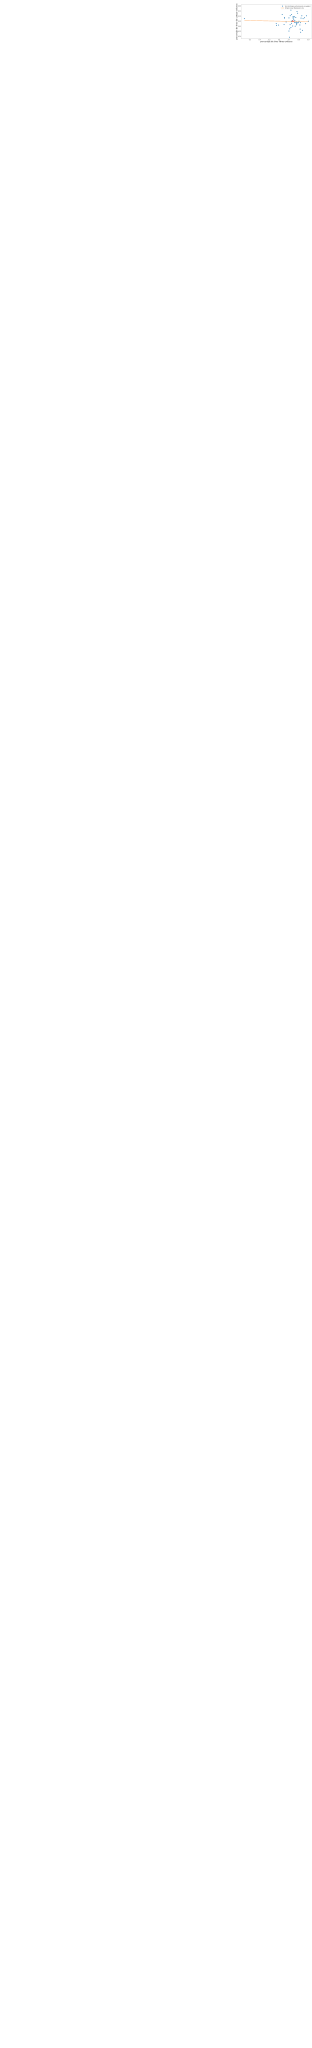

In [7]:
# Reresion Lineal
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(x,y, 'o', markersize = 14, label = "tiros de campo exitosos para un jugador")
plt.plot(x_mean,y_mean, '*', markersize = 30, color = "r")
plt.plot(x, m*x + b, '-', label = 'Simple Linear Regression Line', linewidth = 4)
plt.ylabel('porcentaje de tiros de campo exitosos', fontsize = 30)
plt.xlabel('porcentaje de tiros libres exitosos', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.legend(loc = 'upper right', fontsize = 20)

In [8]:
# Del dataframe total retiramos la variable objetivo (dependiente) para quedarnos con las variables independientes
x_input= training.drop(['porcentajedetirosdecampoexitosos'], axis=1)

In [9]:
# Separando el conjunto de datos en 2 grupos: entrenamiento (train) y prueba (test)
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x_input,y, test_size=0.20)

In [11]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [12]:
# entrenamientos
model.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Realizar la predicciòn sobre el conjunto de entrenamiento

predictions1 = model.predict(x_test)

#predictions sobre el train

predictions1

array([0.41261055, 0.42429595, 0.43937961, 0.45185873, 0.52078025,
       0.47395762, 0.45072926, 0.36912444, 0.47480514, 0.45926048,
       0.43033558])

In [20]:
x_test

,alturaPies,pesoLibras,porcentajedetiroslibresexitosos,puntospromedioanotadosporjuego
12,6.3,185,0.709,8.1
1,6.3,180,0.797,11.7
42,6.2,200,0.804,15.4
48,7.1,245,0.778,2.8
24,7.2,230,0.721,24.6
19,7.1,240,0.714,10.5
43,6.8,235,0.784,7.4
45,5.9,105,0.839,7.9
40,7.3,228,0.726,9.4
51,6.8,225,0.701,11.6


In [21]:
#R2
from sklearn.metrics import r2_score

In [22]:
#R
r2_score(y_test,predictions1)

0.5188995486934768